In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

In [22]:
rawDfQ = pd.read_csv('sar_mpgu_izh.csv', skiprows=57064, sep='\s+', skipinitialspace=True, nrows=(61355-57065), engine='python')
rawDfQ.tail()

,09:20:06,DEV,tps,rd_sec/s,wr_sec/s,avgrq-sz,avgqu-sz,await,svctm,%util
4285,12:35:06,dev8-160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4286,12:35:06,dev8-176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4287,12:35:06,dev8-192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4288,12:35:06,dev8-208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4289,12:35:06,dev253-7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
y = rawDfQ.iloc[:, 6].astype(float)
print(y)

0       0.00
1       0.00
2       0.01
3       0.00
4       0.00
        ... 
4285    0.00
4286    0.00
4287    0.00
4288    0.00
4289    0.00
Name: avgqu-sz, Length: 4290, dtype: float64


In [24]:
dfQu = pd.DataFrame({'Time': rawDfQ.iloc[:,0], 'DEV': rawDfQ.iloc[:,1], 'avgqu-sz': y})
dfQu = dfQu[dfQu['avgqu-sz'] != 0]
dfQu.head(10)

,Time,DEV,avgqu-sz
2,09:21:06,dev253-0,0.01
5,09:21:06,dev253-3,0.03
6,09:21:06,dev253-4,0.03
24,09:22:06,dev253-0,0.01
27,09:22:06,dev253-3,0.03
28,09:22:06,dev253-4,0.03
46,09:23:06,dev253-0,0.01
49,09:23:06,dev253-3,0.03
50,09:23:06,dev253-4,0.03
68,09:24:06,dev253-0,0.01


In [25]:
dev_names = set(dfQu['DEV'])
print(dev_names)

{'dev253-0', 'dev8-0', 'dev253-4', 'dev253-3', 'dev8-16', 'dev253-6'}


In [37]:
dfQ1 = dfQu[dfQu['DEV'] == 'dev253-4']
dfQ2 = dfQu[dfQu['DEV'] == 'dev253-3']
dfQ3 = dfQu[dfQu['DEV'] == 'dev253-6']
dfQ4 = dfQu[dfQu['DEV'] == 'dev253-0']
dfQ5 = dfQu[dfQu['DEV'] == 'dev8-0']
dfQ6 = dfQu[dfQu['DEV'] == 'dev8-16']
dfQ4.head(10)

,Time,DEV,avgqu-sz
2,09:21:06,dev253-0,0.01
24,09:22:06,dev253-0,0.01
46,09:23:06,dev253-0,0.01
68,09:24:06,dev253-0,0.01
90,09:25:06,dev253-0,1.02
112,09:26:06,dev253-0,2.62
134,09:27:06,dev253-0,0.01
156,09:28:06,dev253-0,0.01
178,09:29:06,dev253-0,0.01
200,09:30:06,dev253-0,0.01


In [38]:
dfQ1.reset_index(inplace=True, drop=True)
dfQ2.reset_index(inplace=True, drop=True)
dfQ3.reset_index(inplace=True, drop=True)
dfQ4.reset_index(inplace=True, drop=True)
dfQ5.reset_index(inplace=True, drop=True)
dfQ6.reset_index(inplace=True, drop=True)

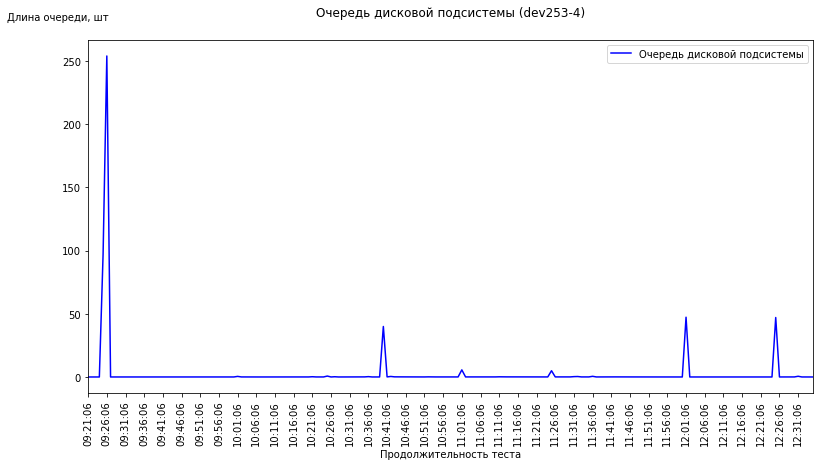

In [42]:
# График для dev253-4
fig, ax = plt.subplots(figsize=(12.992, 6.496))
ax.plot(dfQ1.Time, dfQ1['avgqu-sz'], 'b',label='Очередь дисковой подсистемы')
ax.set_xlabel('Продолжительность теста')
ax.set_ylabel('Длина очереди, шт', rotation=0, y=1.05)
ax.set_title('Очередь дисковой подсистемы (dev253-4)', y=1.05)
ax.legend(loc=1)
ax.tick_params(axis='x', labelrotation=90)
# ax.set_ylim(0,20)

xAxis = np.arange(0, dfQ1.index[-1],5)
plt.xlim(dfQ1['Time'][0], dfQ1['Time'][dfQ1.index[-1]])
plt.xticks(xAxis, dfQ1['Time'][xAxis], rotation='vertical')

plt.savefig('Очередь дисковой подсистемы_1')
plt.show()
plt.close()

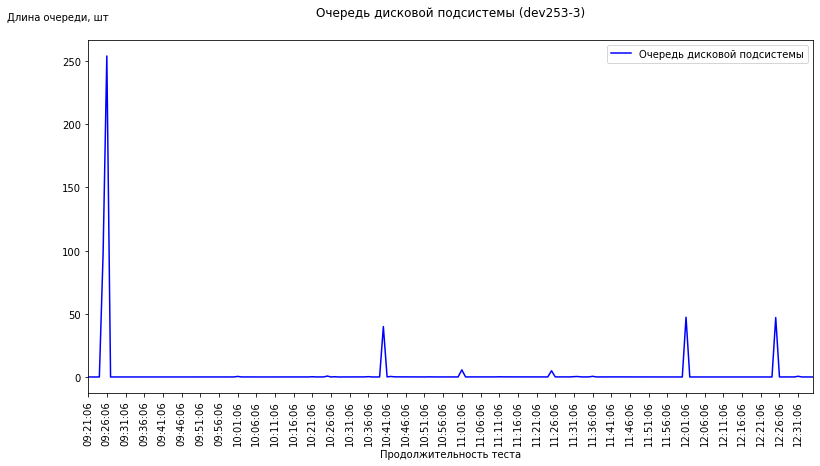

In [43]:
# График для dev253-3
fig, ax = plt.subplots(figsize=(12.992, 6.496))
ax.plot(dfQ2.Time, dfQ2['avgqu-sz'], 'b',label='Очередь дисковой подсистемы')
ax.set_xlabel('Продолжительность теста')
ax.set_ylabel('Длина очереди, шт', rotation=0, y=1.05)
ax.set_title('Очередь дисковой подсистемы (dev253-3)', y=1.05)
ax.legend(loc=1)
ax.tick_params(axis='x', labelrotation=90)
# ax.set_ylim(0,20)

xAxis = np.arange(0, dfQ2.index[-1],5)
plt.xlim(dfQ2['Time'][0], dfQ2['Time'][dfQ2.index[-1]])
plt.xticks(xAxis, dfQ2['Time'][xAxis], rotation='vertical')

plt.savefig('Очередь дисковой подсистемы_2')
plt.show()
plt.close()

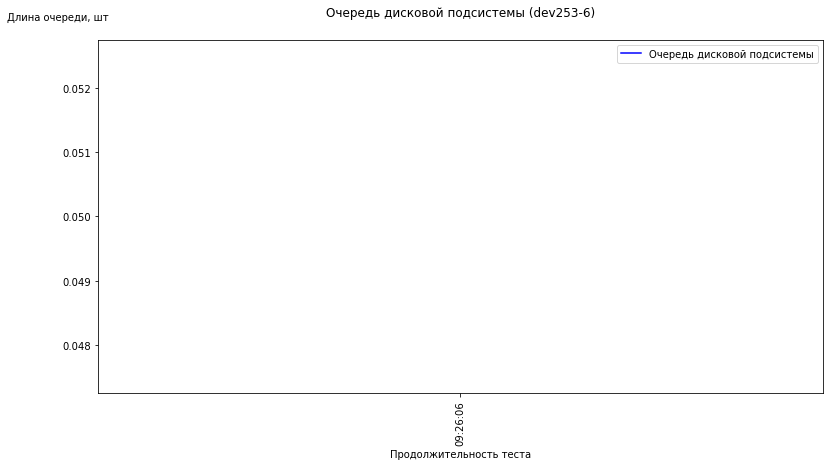

In [35]:
# # График для dev253-6
# fig, ax = plt.subplots(figsize=(12.992, 6.496))
# ax.plot(dfQ3.Time, dfQ3['avgqu-sz'], 'b',label='Очередь дисковой подсистемы')
# ax.set_xlabel('Продолжительность теста')
# ax.set_ylabel('Длина очереди, шт', rotation=0, y=1.05)
# ax.set_title('Очередь дисковой подсистемы (dev253-6)', y=1.05)
# ax.legend(loc=1)
# ax.tick_params(axis='x', labelrotation=90)
# # ax.set_ylim(0,20)

# # xAxis = np.arange(0, dfQ3.index[-1],5)
# # plt.xlim(dfQ3['Time'][0], dfQ3['Time'][dfQ3.index[-1]])
# # plt.xticks(xAxis, dfQ3['Time'][xAxis], rotation='vertical')

# # plt.savefig('Очередь дисковой подсистемы_3')
# plt.show()
# plt.close()

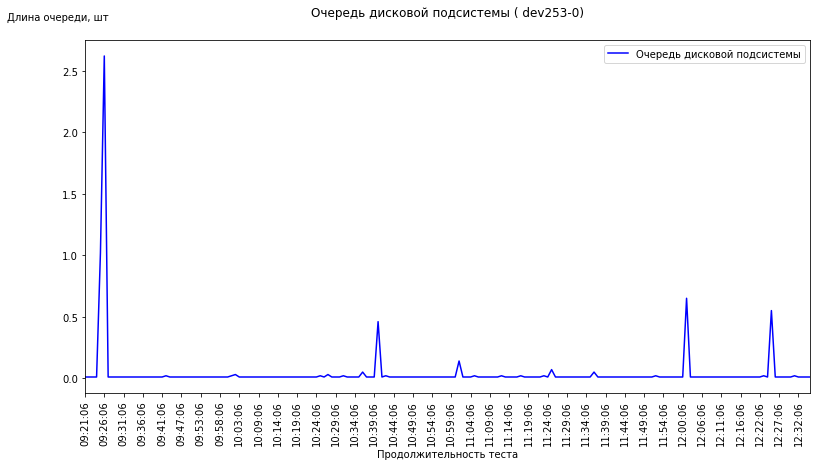

In [44]:
# График для  dev253-0
fig, ax = plt.subplots(figsize=(12.992, 6.496))
ax.plot(dfQ4.Time, dfQ4['avgqu-sz'], 'b',label='Очередь дисковой подсистемы')
ax.set_xlabel('Продолжительность теста')
ax.set_ylabel('Длина очереди, шт', rotation=0, y=1.05)
ax.set_title('Очередь дисковой подсистемы ( dev253-0)', y=1.05)
ax.legend(loc=1)
ax.tick_params(axis='x', labelrotation=90)
# ax.set_ylim(0,20)

xAxis = np.arange(0, dfQ4.index[-1],5)
plt.xlim(dfQ4['Time'][0], dfQ4['Time'][dfQ4.index[-1]])
plt.xticks(xAxis, dfQ4['Time'][xAxis], rotation='vertical')

plt.savefig('Очередь дисковой подсистемы_4')
plt.show()
plt.close()

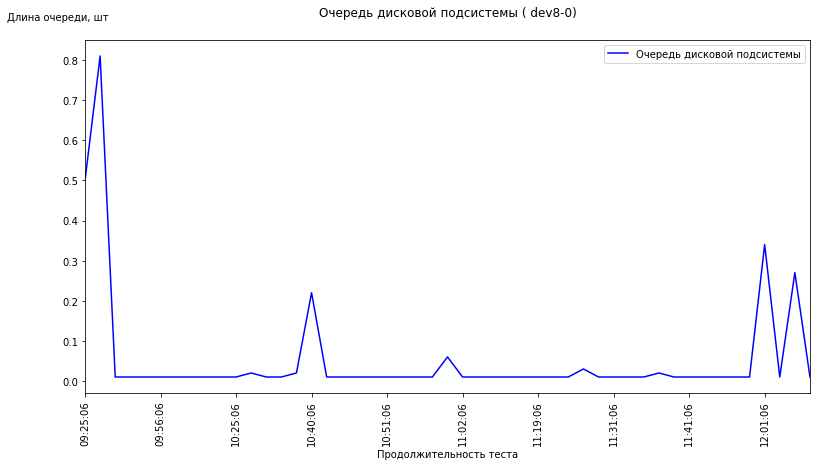

In [45]:
# График для  dev8-0
fig, ax = plt.subplots(figsize=(12.992, 6.496))
ax.plot(dfQ5.Time, dfQ5['avgqu-sz'], 'b',label='Очередь дисковой подсистемы')
ax.set_xlabel('Продолжительность теста')
ax.set_ylabel('Длина очереди, шт', rotation=0, y=1.05)
ax.set_title('Очередь дисковой подсистемы ( dev8-0)', y=1.05)
ax.legend(loc=1)
ax.tick_params(axis='x', labelrotation=90)
# ax.set_ylim(0,20)

xAxis = np.arange(0, dfQ5.index[-1],5)
plt.xlim(dfQ5['Time'][0], dfQ5['Time'][dfQ5.index[-1]])
plt.xticks(xAxis, dfQ5['Time'][xAxis], rotation='vertical')

plt.savefig('Очередь дисковой подсистемы_5')
plt.show()
plt.close()

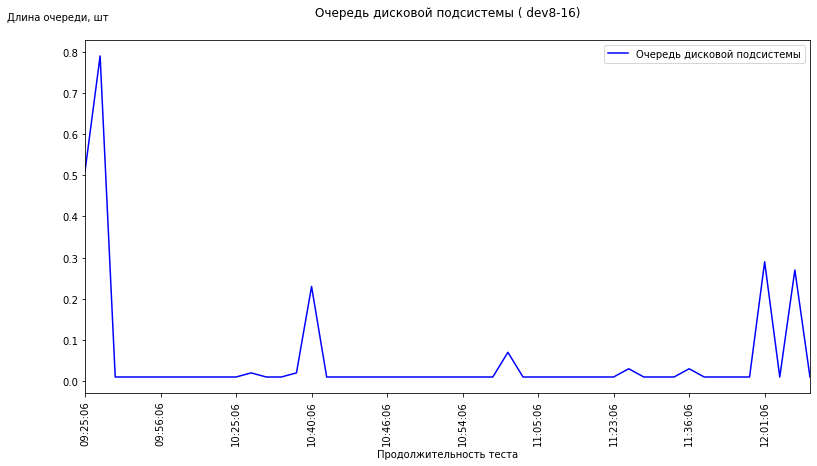

In [46]:
# График для  dev8-16
fig, ax = plt.subplots(figsize=(12.992, 6.496))
ax.plot(dfQ6.Time, dfQ6['avgqu-sz'], 'b',label='Очередь дисковой подсистемы')
ax.set_xlabel('Продолжительность теста')
ax.set_ylabel('Длина очереди, шт', rotation=0, y=1.05)
ax.set_title('Очередь дисковой подсистемы ( dev8-16)', y=1.05)
ax.legend(loc=1)
ax.tick_params(axis='x', labelrotation=90)
# ax.set_ylim(0,20)

xAxis = np.arange(0, dfQ6.index[-1],5)
plt.xlim(dfQ6['Time'][0], dfQ6['Time'][dfQ6.index[-1]])
plt.xticks(xAxis, dfQ6['Time'][xAxis], rotation='vertical')

plt.savefig('Очередь дисковой подсистемы_6')
plt.show()
plt.close()